<a href="https://colab.research.google.com/github/nitron-alpha-kplr/Machine-Learning/blob/main/05_1_Random_Forests_Iris_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification avec la random forest

### Étape 1: Importation des bibliothèques nécessaires
Commençons par importer les bibliothèques Python nécessaires pour notre analyse.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Étape 2: Chargement des données
Ensuite, nous allons charger notre ensemble de données à partir de scikit-learn (iris dataset). Vous pouvez remplacer cette étape par le chargement de votre propre ensemble de données en utilisant les méthodes appropriées.

In [ ]:
# Chargement des données Iris
iris = load_iris()

## Étape 3: Préparation des données
Avant de construire notre modèle, nous devons préparer nos données. Cela implique généralement la division de l'ensemble de données en ensembles d'entraînement et de test, ainsi que la séparation des fonctionnalités et des étiquettes.

In [ ]:
# Division des données en ensembles d'entraînement (80%) et de test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

## Étape 4: Construction du modèle
Maintenant que nos données sont prêtes, nous pouvons construire notre modèle de forêt aléatoire.

In [ ]:
# Initialisation du classifieur
rndf = RandomForestClassifier()

# Entraînement du modèle sur l'ensemble d'entraînement
rndf.fit(X_train, y_train)

RandomForestClassifier()

## Étape 5: Évaluation simple du modèle
Une fois que notre modèle est entraîné, nous pouvons l'évaluer en utilisant l'ensemble de test.

In [ ]:
# Calcul de la précision du modèle
print("Model score :", rndf.score(X_test, y_test))

Model score : 1.0


## Étape 6: Visualisation des features par importance

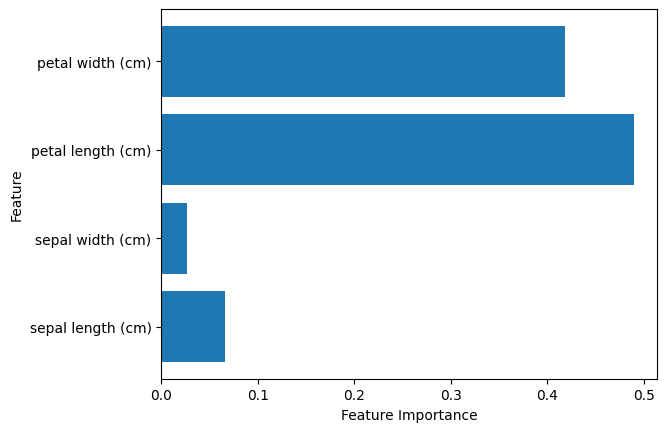

In [ ]:
n_features = iris.data.shape[1]
plt.barh(range(n_features), rndf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), iris.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#Etape 7 : Benchmarking en fonction du nombre de features

Text(0.5, 0, 'Number of features')

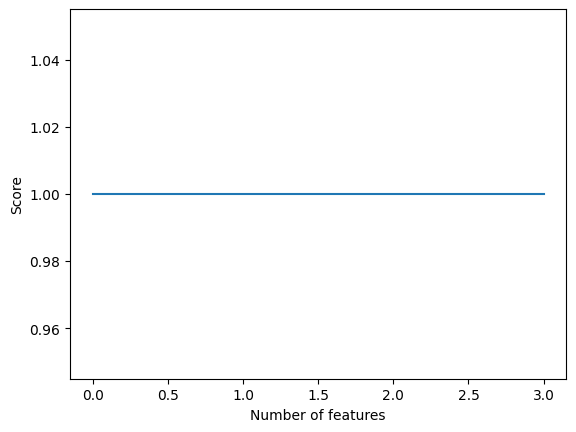

In [ ]:
scores=[]
for i in range(1,len(iris.feature_names)+1):
  rndf = RandomForestClassifier(max_features=i)
  rndf.fit(X_train, y_train)
  scores.append(rndf.score(X_test, y_test))
  #print(f"Model score ({i} features) : {scores[i-1]*100:.2f}%")

plt.plot(scores, label='Score for various features numbers')
plt.ylabel('Score')
plt.xlabel('Number of features')

#Etape 8 : Benchmarking en fonction du nombre d'arbres dans la forêt

Text(0.5, 0, 'Number of trees')

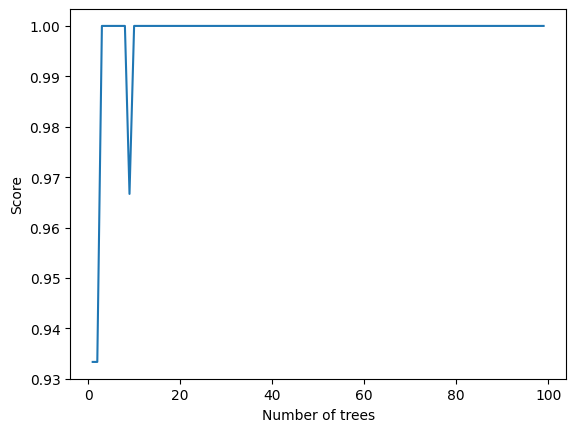

In [ ]:
scores={}
for i in range(1,100):
  rndf = RandomForestClassifier(i)
  rndf.fit(X_train, y_train)
  scores[i]=rndf.score(X_test, y_test)
  #print(f"Model score ({i} trees) : {scores[i]*100:.2f}%")

plt.plot(scores.keys(), scores.values(), label='Score for various trees numbers')
plt.ylabel('Score')
plt.xlabel('Number of trees')

#Etape 9 : Benchmarking en fonction de la profondeur des arbres

Text(0.5, 0, 'Max depth')

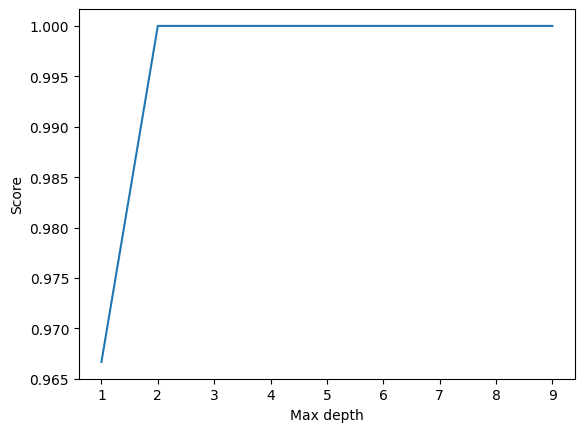

In [ ]:
scores={}
for i in range(1,10):
  rndf = RandomForestClassifier(max_depth=i)
  rndf.fit(X_train, y_train)
  scores[i]=rndf.score(X_test, y_test)
  #print(f"Model score (max_depth = {i}) : {scores[i]*100:.2f}%")

plt.plot(scores.keys(), scores.values(), label='Score for various max_depth values')
plt.ylabel('Score')
plt.xlabel('Max depth')